# Diffusion in 2d

  __Goal__ : Simulate diffusion of a particle in 2D on a lattice. Plot the relevant statistical quantities when many particles are involved

  The idea is to code an algorithm that make a particle diffuse "n" steps on a 2d lattice by throwing a  4-facet dice every step of the way.
  On the bases of the result (1, 2, 3 or 4) the particle can go up, down, left or right. 

  The function is already coded down here. 
  
 The assignment (explained in detail below) constists in running such function multiple times to simulate multiple particles and gather the needed statistics (e.g final displacement) to be studied statistically and in correlation with nsteps. 

  

## 1) Load Libraries (numpy and matplotlib)

In [1]:
#import numpy e matplotlib

import numpy as np #for math and algebra
import matplotlib.pyplot as plt #for plotting

# 2) Generate discrete numbers from 1 to 4, plot the histogram

Text(0.5, 1.0, '4-facet Dice statistics')

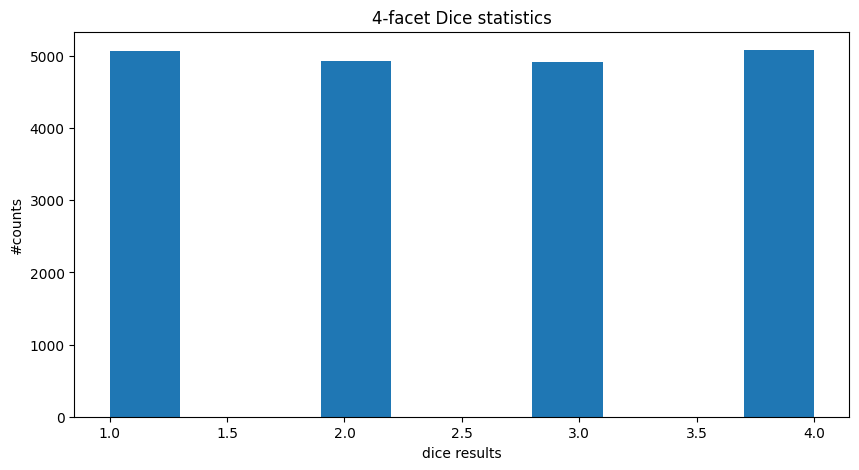

In [2]:
steps=20000; #number of steps

# this is how i throw my dice. I generate an array of discrete number from 1 to 4 reflecting the 4 possible direction i can go at every steps
dice=np.random.randint(1,5,steps); #how many time i want to throw the dice

# plotting...
plt.figure(figsize=(10,5))
plt.hist(dice);
plt.xlabel('dice results')
plt.ylabel('#counts')
plt.title('4-facet Dice statistics')

# 3) I use the dice to make a particle walk on a square lattice 

ATTENTION: only moves along the lattice. no diagonal moves

Text(0.5, 1.0, '2D Random Walk')

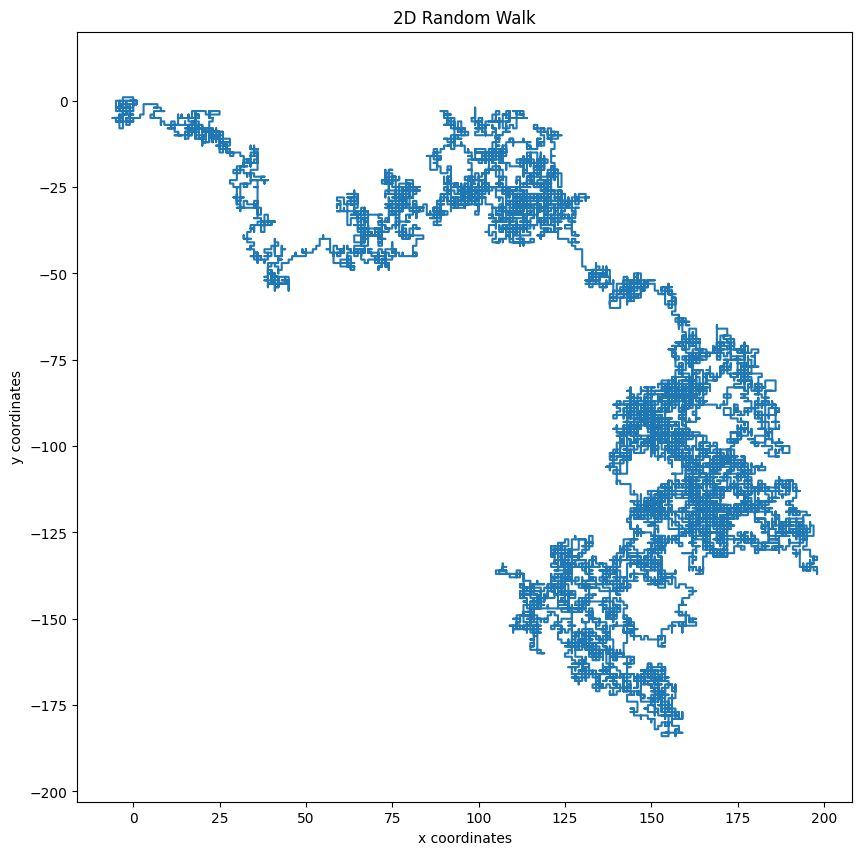

In [3]:
# generate x and y coordinates array the length of the number of steps 
x=np.zeros(steps);
y=np.zeros(steps);

# make the particle walk
for i in range(1,len(dice)):
    x[i]=x[i-1];
    y[i]=y[i-1];

    if (dice[i]==1.):
        x[i]=x[i]+1;
    elif (dice[i]==2.):
        y[i]=y[i]+1;
    elif (dice[i]==3.):
        x[i]=x[i]-1;
    elif (dice[i]==4.):
        y[i]=y[i]-1;
        
        
# plot everything         
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.axis('equal')
plt.xlabel('x coordinates')
plt.ylabel('y coordinates')
plt.title('2D Random Walk')

# 3b) I promote the 2D random walk to a function(input=steps, output=x,y)

In [4]:
def random_walk_2D(steps):
    dice=np.round(np.random.rand(steps)*4-.5);      #per shifatrre intervallo in zero così che abbia la stessa prob
    #dice= np.random.randint(1, 4, steps)
    x=np.zeros(steps);
    y=np.zeros(steps);
    for i in range(1,len(dice)):
        x[i]=x[i-1];
        y[i]=y[i-1];

        if (dice[i]==0.):
            x[i]=x[i]+1;
        elif (dice[i]==1.):
            y[i]=y[i]+1;
        elif (dice[i]==2.):
            x[i]=x[i]-1;
        elif (dice[i]==3.):
            y[i]=y[i]-1;
    return(x,y)



# 3c) Plot multiple random walks

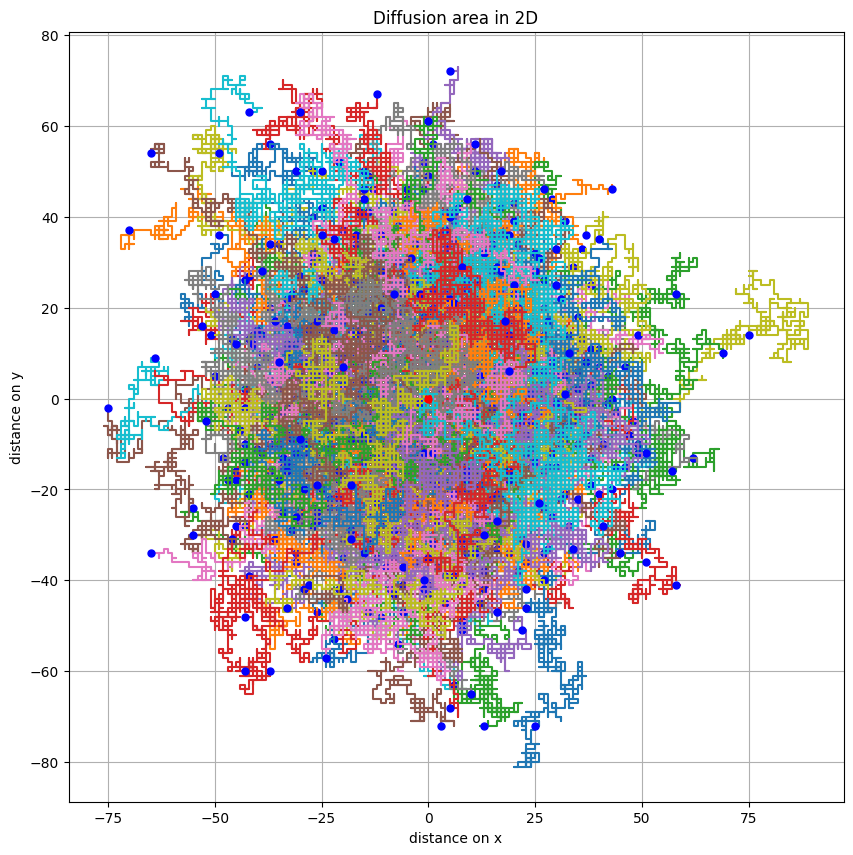

In [5]:
nparticles= 1000
steps=1000
steps2= 10

plt.figure(figsize =(10,10))

for i in range (0, nparticles):
    x, y= random_walk_2D(steps)
    plt.plot(x,y)
    plt.plot( x[0], y[0], '.r', markersize= 10)
    plt. plot(x[-1], y[-1], '.b', markersize= 10) #extract the last #red dot  #print initial point

plt.xlabel("distance on x")
plt.ylabel("distance on y")
plt.grid(True)
plt.title("Diffusion area in 2D")
plt.show()

# 4) What is the distribution of displacement?

how do the particle explore the space given a fixed number of steps? 

1) Extract the final point (x,y) for every simulated randow walk and save it in a list
2) Plot the final point for every random walk in the plane
3) Calculate from the final point the final displacement and plot the istrogram of them

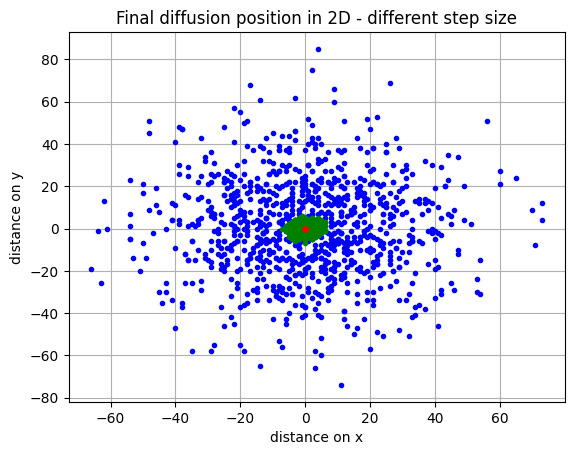

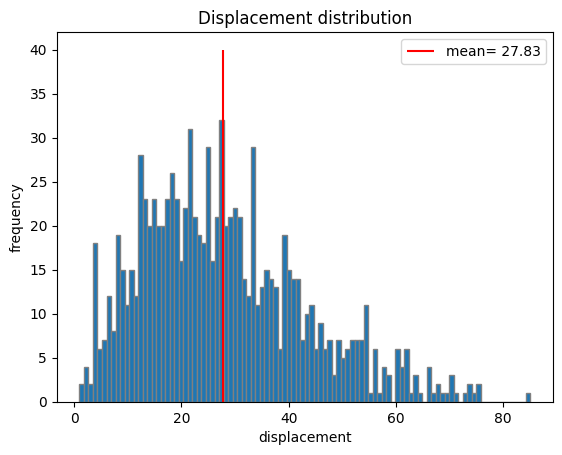

In [6]:
#you do it! down here there is an example of figure, final displacement as a red dot
distance= []
mean_l= []
final_point= []

for i in range (0, nparticles):
    x, y= random_walk_2D(steps)
    plt.plot( x[0], y[0], '.r')
    plt. plot(x[-1], y[-1], '.b') #extract the last #red dot  #print inital point
    distance.append( x[-1]**2 + y[-1]**2)
    final_point.append((x[-1], y[-1])) 

for i in range (0, nparticles):
    x, y= random_walk_2D(steps2)
    #plt.plot(x,y)
    plt.plot( x[0], y[0], '.r')
    plt. plot(x[-1], y[-1], '.g') #extract the last #red dot  #print inal point

plt.xlabel("distance on x")
plt.ylabel("distance on y")
plt.title("Final diffusion position in 2D - different step size")
plt.grid(True)
plt.show()   

#final displacement 
plt.hist(np.sqrt(distance), bins= 100, ec= "gray")
plt.vlines(np.mean(np.sqrt(distance)), 0, 40, color="red", label= f'mean={np.mean(np.sqrt(distance)): .2f}')
plt.ylabel("frequency")
plt.xlabel("displacement")
plt.legend()
plt.title ("Displacement distribution")
plt.show()

In [7]:
#list of final position for every iteration
final_point

[(-36.0, 15.0),
 (3.0, 18.0),
 (-6.0, 29.0),
 (18.0, 17.0),
 (-6.0, 7.0),
 (-12.0, 5.0),
 (-2.0, 9.0),
 (33.0, 4.0),
 (-14.0, -15.0),
 (-12.0, -5.0),
 (-24.0, 19.0),
 (5.0, 8.0),
 (-22.0, 13.0),
 (-8.0, -15.0),
 (12.0, 3.0),
 (1.0, -18.0),
 (4.0, 11.0),
 (25.0, 26.0),
 (9.0, 2.0),
 (-7.0, -28.0),
 (-10.0, -11.0),
 (16.0, -19.0),
 (-6.0, -5.0),
 (-15.0, 20.0),
 (-11.0, 8.0),
 (22.0, -15.0),
 (60.0, 21.0),
 (-17.0, 18.0),
 (10.0, -1.0),
 (20.0, -3.0),
 (-15.0, 4.0),
 (-2.0, 3.0),
 (-15.0, -8.0),
 (-14.0, 7.0),
 (-16.0, 37.0),
 (9.0, -6.0),
 (2.0, 5.0),
 (35.0, 12.0),
 (20.0, 9.0),
 (-13.0, -2.0),
 (3.0, -12.0),
 (38.0, 9.0),
 (-4.0, 1.0),
 (5.0, 40.0),
 (-28.0, 7.0),
 (-23.0, -42.0),
 (32.0, -7.0),
 (38.0, -1.0),
 (1.0, -18.0),
 (21.0, 10.0),
 (23.0, 20.0),
 (23.0, 12.0),
 (-6.0, -31.0),
 (-7.0, 44.0),
 (-7.0, 2.0),
 (-13.0, 14.0),
 (32.0, -3.0),
 (-4.0, 17.0),
 (16.0, 19.0),
 (47.0, -12.0),
 (-5.0, -4.0),
 (27.0, -6.0),
 (-50.0, 21.0),
 (6.0, -11.0),
 (2.0, 7.0),
 (-8.0, -9.0),
 (3.0, -

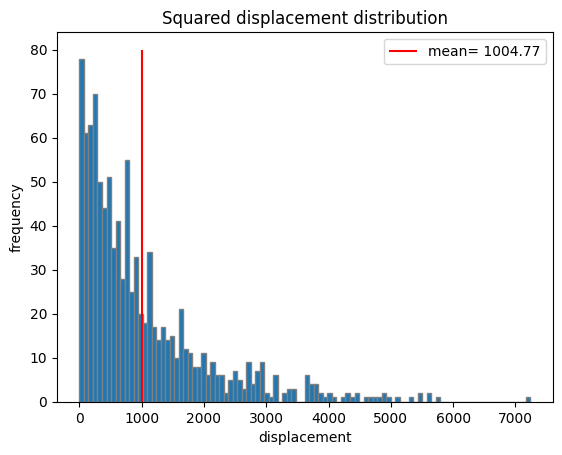

In [8]:
plt.hist(distance, bins= 100, ec= "gray")
mean= np.mean (distance)
plt.vlines(mean, 0, 80, color="red", label= f'mean={mean: .2f}')

plt.title ("Squared displacement distribution")
plt.ylabel("frequency")
plt.xlabel("displacement")
plt.legend()
plt.show()


# 5) MSD vs Time


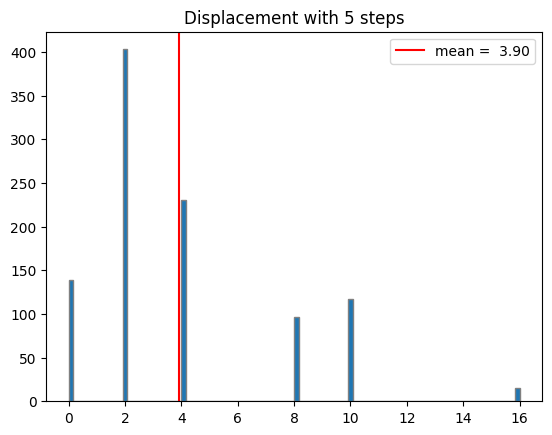

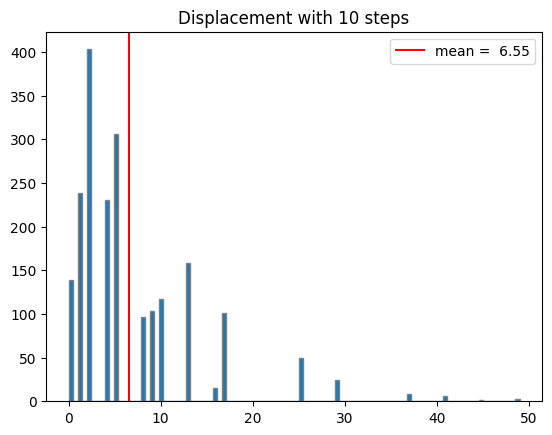

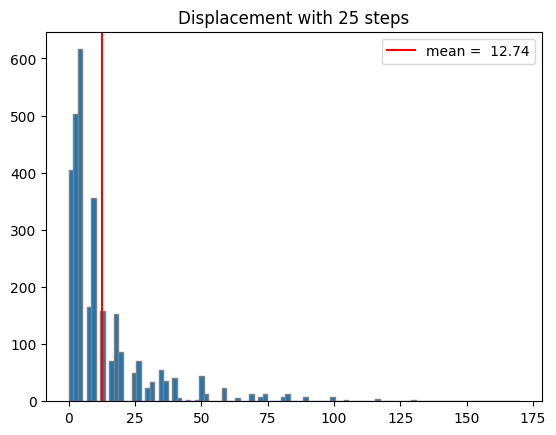

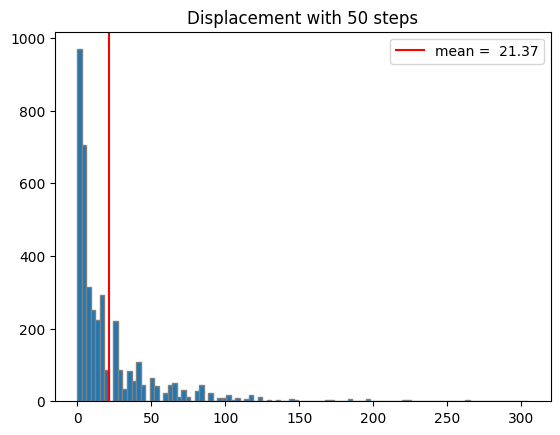

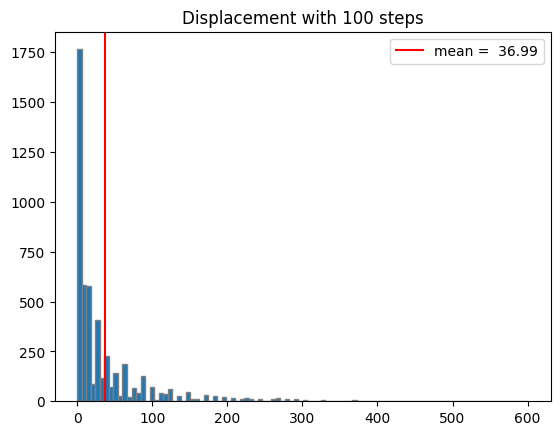

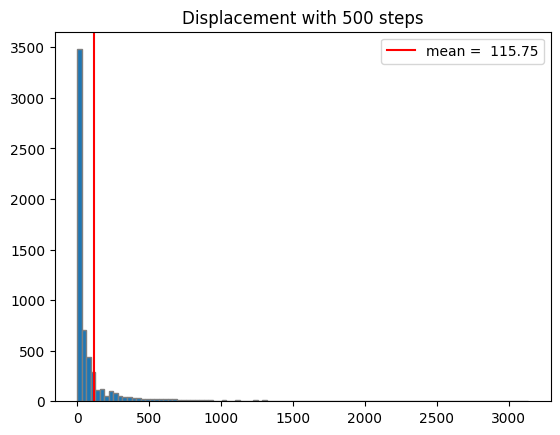

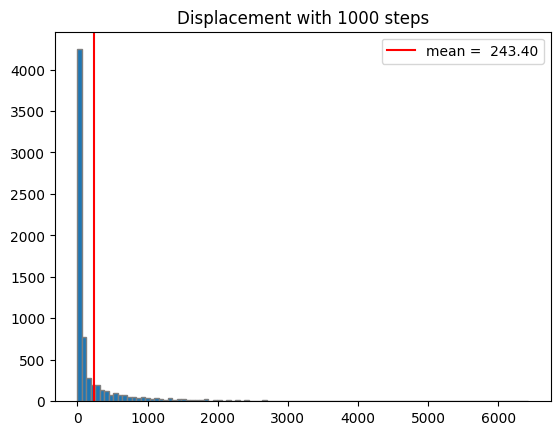

In [9]:
mean_l= []
nsteps=[5, 10, 25, 50, 100, 500, 1000]
distance=[] #se no nn se lo ricorda!!! continua ad appendere

for nstep in nsteps:
    for i in range (0, nparticles):
        x, y= random_walk_2D(nstep)
       # plt. plot(x[-1], y[-1], '.b') #extract the last #red dot  #print inal point
        distance.append( x[-1]**2 + y[-1]**2)        
    mean_l.append(np.mean (distance))
    plt.axvline(mean_l[-1], color="red", label= f'mean = {mean_l[-1]: .2f}')
    plt.hist(distance, bins= 100, ec = 'grey')
    plt.title(f'Displacement with {nstep} steps')
    plt.legend ()
    plt.show()




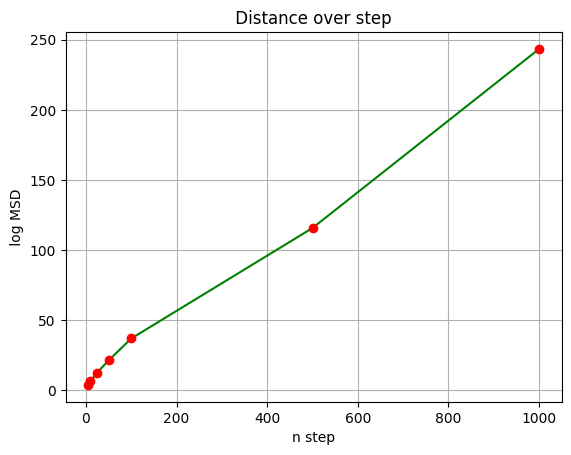

In [10]:
#logscale distance over step
plt.plot( nsteps, mean_l, color= "green", label= ("Log scale"))
plt.plot( nsteps, mean_l, marker = 'o', color= "red", linestyle= "None")  
#plt.yscale('log')
#plt.xscale('log')
plt.title (" Distance over step ")
plt.xlabel ("n step")
plt.ylabel (" log MSD ")
plt.grid(True)
plt.show()

1) Calculate the mean square displacement (MSD) for every distribution, where is located on the distribution of displacement?
2) What is the dependence of MSD on chosen nsteps? represent it in a graph